In [ ]:

# 1. IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Configuración de estilo de gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 2.CARGA DE DATOS
df = pd.read_csv('D:/RENATO/Desktop/data/credit_risk_es.csv')  # Ajusta la ruta si es necesario

# 3.EXPLORACIÓN INICIAL 
print("Dimensiones del dataset:", df.shape)
print("\n Primeras filas:")
print(df.head())
print("\n Información general:")
print(df.info())
print("\n Valores nulos por columna:")
print(df.isnull().sum())


Dimensiones del dataset: (207, 15)

 Primeras filas:
           distrito actividad_comercial tipo_de_vivienda       sexo  edad  \
0             AHUAC         DEPENDIENTE           PROPIA   FEMENINO    38   
1  HUAMANCACA CHICO         DEPENDIENTE           PROPIA  MASCULINO    39   
2           CHUPACA   COMERCIO FAMILIAR         FEMENINO   FEMENINO    42   
3           CHUPACA         DEPENDIENTE         FAMILIAR   FEMENINO    22   
4           CHUPACA            COMERCIO           PROPIA   FEMENINO    35   

  condicion_civil  num_hijos  monto_desembolsado  plazo_del_credito aval  \
0     CONVIVIENTE          2             2012.87                 12   NO   
1     CONVIVIENTE          1            45865.30                 48   NO   
2         SOLTERO          1             1007.44                 12   NO   
3         SOLTERO          0             2012.87                 12   SI   
4     CONVIVIENTE          2             1509.71                 12   NO   

  tipo_de_garantia  max_dia

In [ ]:
# 4. LIMPIEZA DE DATOS
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Eliminar filas con valores faltantes en columnas clave
df.dropna(subset=['segmentacion_riesgo', 'edad', 'monto_desembolsado'], inplace=True)

# 5. ANÁLISIS DESCRIPTIVO
print("\n Distribución por sexo:")
print(df['sexo'].value_counts())

print("\n Estadísticas de edad y monto:")
print(df[['edad', 'monto_desembolsado']].describe())



 Distribución por sexo:
sexo
FEMENINO     110
MASCULINO     97
Name: count, dtype: int64

 Estadísticas de edad y monto:
             edad  monto_desembolsado
count  207.000000        2.070000e+02
mean    41.082126        1.880466e+04
std     10.972075        8.295253e+04
min     22.000000        3.008800e+02
25%     34.500000        1.509710e+03
50%     39.000000        3.019310e+03
75%     48.000000        1.003010e+04
max     68.000000        1.137732e+06


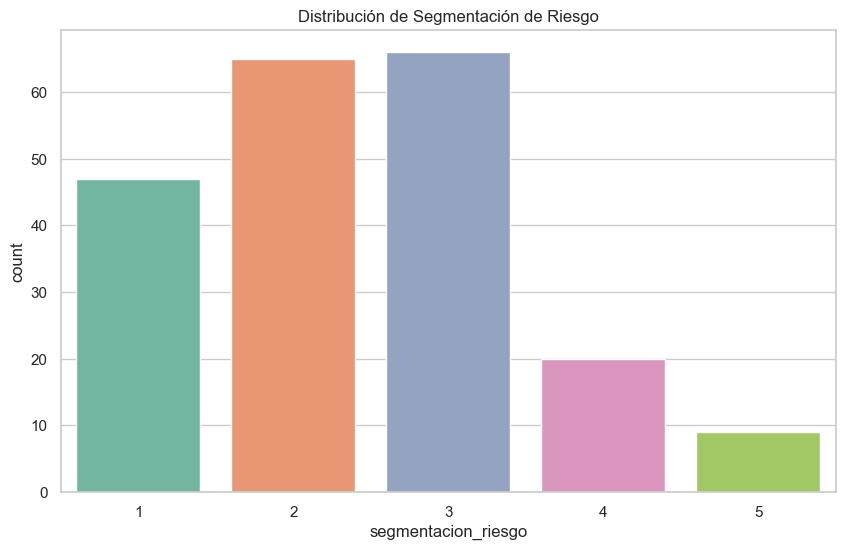

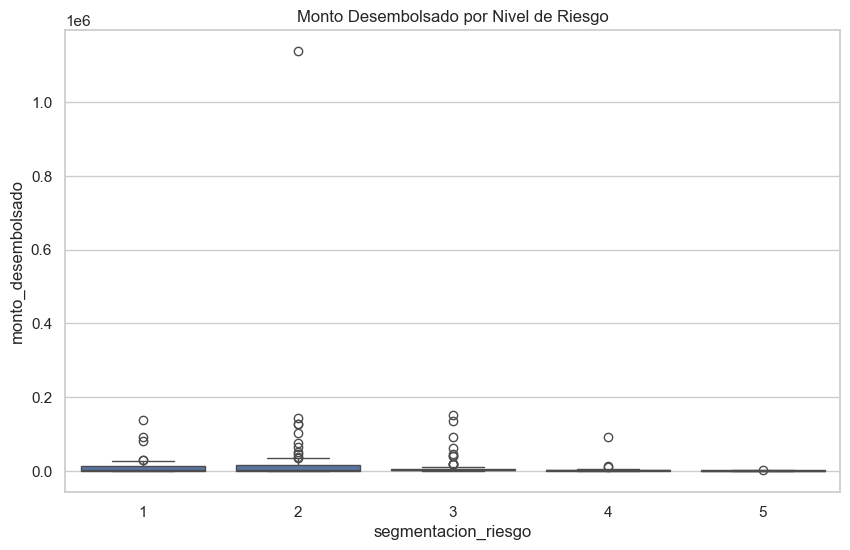

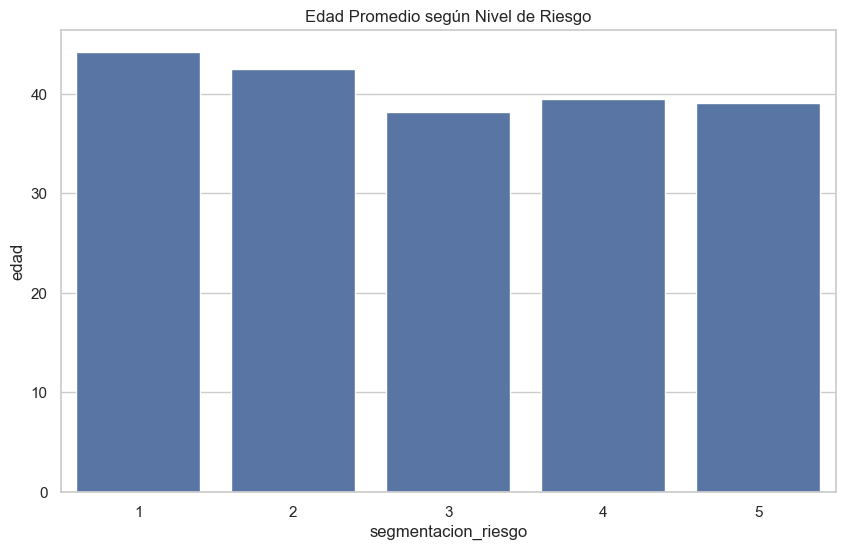

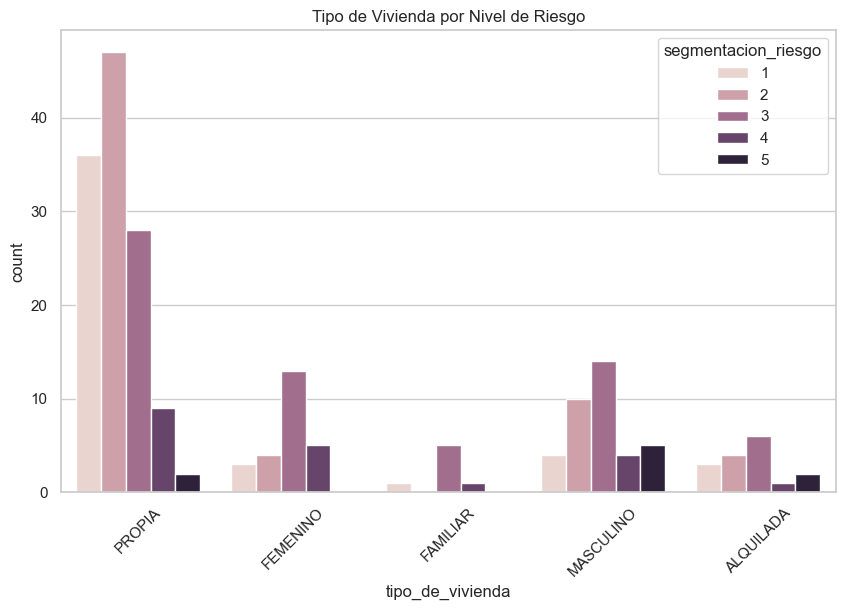

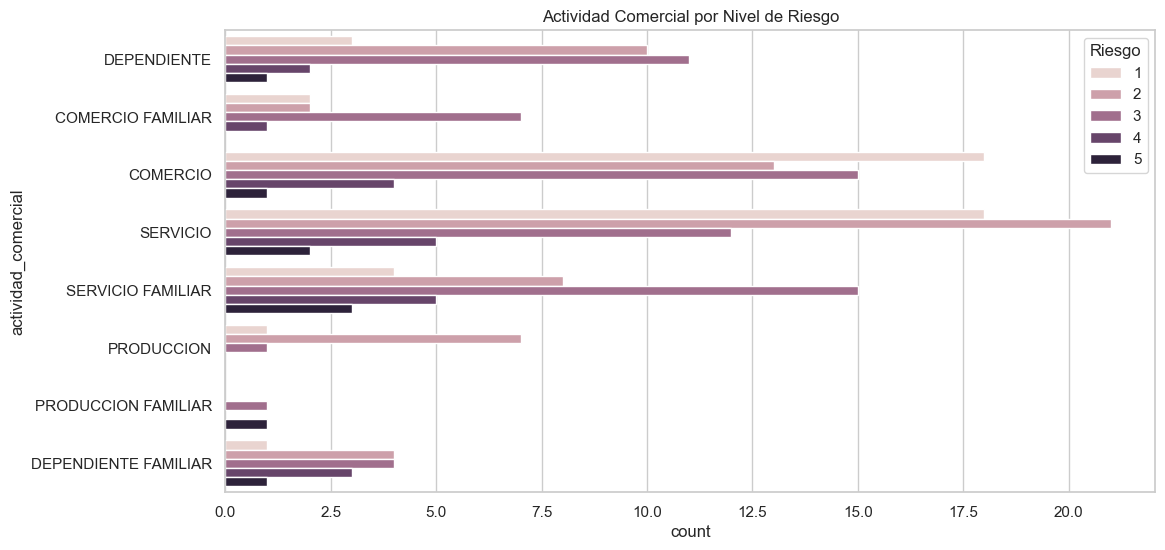

In [ ]:
# 6. VISUALIZACIONES EXPLORATORIAS

# Distribución de la variable objetivo
sns.countplot(data=df, x='segmentacion_riesgo',hue='segmentacion_riesgo', palette='Set2', legend=False)
plt.title('Distribución de Segmentación de Riesgo')
plt.show()

# Monto desembolsado por riesgo
sns.boxplot(data=df, x='segmentacion_riesgo', y='monto_desembolsado')
plt.title('Monto Desembolsado por Nivel de Riesgo')
plt.show()

# Edad promedio por nivel de riesgo
sns.barplot(data=df, x='segmentacion_riesgo', y='edad', errorbar=None)
plt.title('Edad Promedio según Nivel de Riesgo')
plt.show()

# Tipo de vivienda vs riesgo
sns.countplot(data=df, x='tipo_de_vivienda', hue='segmentacion_riesgo')
plt.title('Tipo de Vivienda por Nivel de Riesgo')
plt.xticks(rotation=45)
plt.show()

# Actividad comercial vs riesgo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='actividad_comercial', hue='segmentacion_riesgo')
plt.title('Actividad Comercial por Nivel de Riesgo')
plt.legend(title='Riesgo')
plt.show()


In [ ]:
# 7. PREPARACIÓN PARA EL MODELO

# Crear copia para modelar
df_model = df.copy()

# Codificar variables categóricas con one-hot encoding
cat_cols = ['sexo', 'tipo_de_vivienda', 'actividad_comercial', 'aval', 'tipo_de_garantia', 'condicion_civil']
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Codificar la variable objetivo
le = LabelEncoder()
df_model['segmentacion_riesgo'] = le.fit_transform(df_model['segmentacion_riesgo'])

# Eliminar columnas no necesarias para el modelo
df_model.drop(['distrito', 'calificacion_sistema'], axis=1, inplace=True)

# Separar X (features) e y (objetivo)
X = df_model.drop('segmentacion_riesgo', axis=1)
y = df_model['segmentacion_riesgo']

In [ ]:
# 8. DIVISIÓN DE DATOS Y ENTRENAMIENTO DEL MODELO

# Dividir los datos en entrenamiento y prueba (70% - 30%), estratificando por clase
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ESCALAR los datos: paso clave para evitar el warning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de regresión logística

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
# 9. EVALUACIÓN DEL MODELO
print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\n Matriz de confusión:")
print(cm)


 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        14
           1       0.33      0.35      0.34        20
           2       0.35      0.30      0.32        20
           3       0.57      0.67      0.62         6
           4       0.67      0.67      0.67         3

    accuracy                           0.41        63
   macro avg       0.48      0.50      0.49        63
weighted avg       0.41      0.41      0.41        63


 Matriz de confusión:
[[ 7  4  3  0  0]
 [ 6  7  7  0  0]
 [ 2 10  6  2  0]
 [ 0  0  1  4  1]
 [ 0  0  0  1  2]]


In [ ]:
# 10. CONCLUSIONES
print("\nCONCLUSIONES:")
print(" El análisis muestra que variables como edad, tipo de vivienda y monto solicitado influyen en el riesgo crediticio.")
print(" Se entrenó un modelo simple de regresión logística para predecir el nivel de riesgo.")
print(" El modelo puede ser mejorado en el futuro con modelos más complejos o más datos.")



CONCLUSIONES:
 El análisis muestra que variables como edad, tipo de vivienda y monto solicitado influyen en el riesgo crediticio.
 Se entrenó un modelo simple de regresión logística para predecir el nivel de riesgo.
 El modelo puede ser mejorado en el futuro con modelos más complejos o más datos.


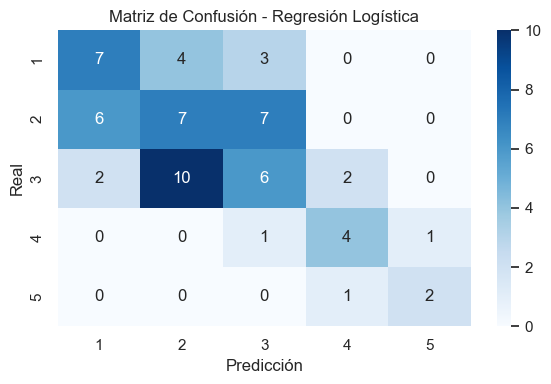

In [19]:
# Visualizar la matriz de confusión como heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.tight_layout()
plt.show()


 Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.37      0.50      0.42        14
           1       0.29      0.20      0.24        20
           2       0.29      0.35      0.32        20
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         3

    accuracy                           0.30        63
   macro avg       0.23      0.24      0.23        63
weighted avg       0.28      0.30      0.29        63


 Matriz de confusión (Random Forest):
[[7 4 3 0 0]
 [7 4 9 0 0]
 [5 6 7 2 0]
 [0 0 4 1 1]
 [0 0 1 2 0]]


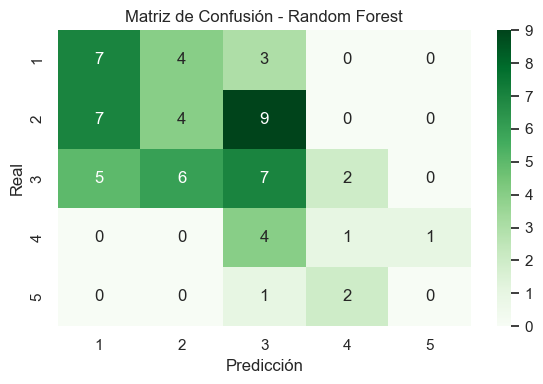

In [20]:

from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Importante si hay clases desbalanceadas
)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Reporte de métricas
print("\n Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n Matriz de confusión (Random Forest):")
print(cm_rf)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()
